#### Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("ToyotaCorolla.csv")

In [3]:
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# EDA

In [4]:
data.shape

(1436, 38)

In [5]:
data.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [7]:
data = pd.concat([data.iloc[:,2:4],data.iloc[:,6],data.iloc[:,8],data.iloc[:,12:14],data.iloc[:,15:18]],axis=1)

In [8]:
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [9]:
data2 = data.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis=1)

In [10]:
data2

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [11]:
data2[data2.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [12]:
data3 = data2.drop_duplicates().reset_index(drop=True)

In [13]:
data3

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [14]:
data3.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


# Correlation

In [15]:
data3.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


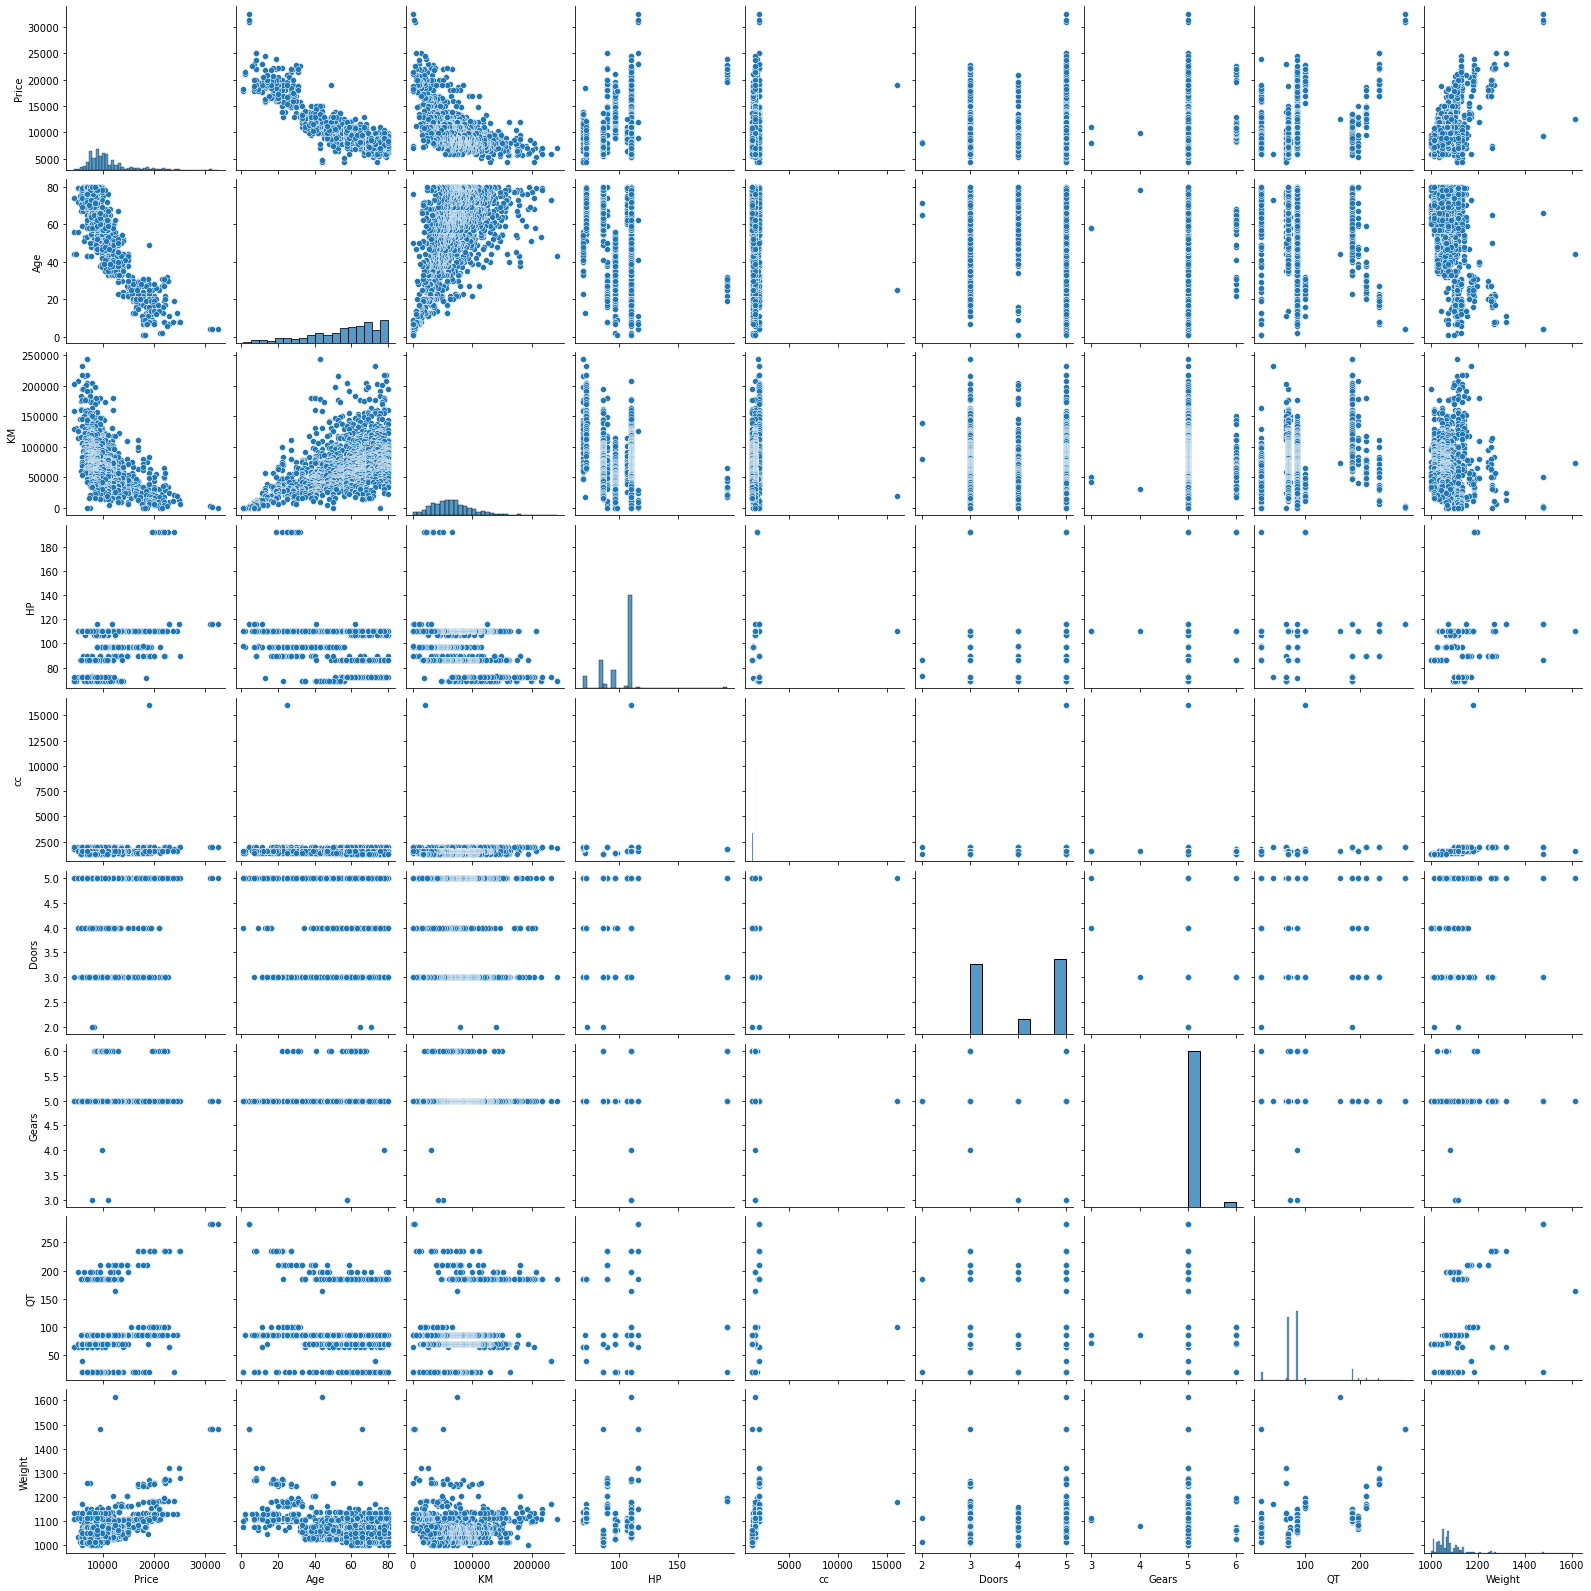

In [16]:
sns.pairplot(data3)

# Prepairing a Model

In [17]:
import statsmodels.formula.api as smf

In [18]:
model1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=data3).fit()

In [19]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:09:02   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Probability of cc and Doors columns is greter that 0.05 so we have to imporve it. so for that 2 columns only apply SLR & MLR


# Simple Linear Regression model

In [20]:
model2 = smf.ols('Price~cc',data=data3).fit()

In [21]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           2.29e-06
Time:                        23:09:02   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model3 = smf.ols('Price~Doors',data=data3).fit()

In [23]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           2.40e-12
Time:                        23:09:02   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model4 = smf.ols('Price~cc+Doors',data=data3).fit()

In [25]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           2.55e-15
Time:                        23:09:02   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
cc             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Validatiion techniques

# 1)calculating VIF

In [26]:
rsq_Age = smf.ols('Age~KM+HP+cc+Doors+Gears+QT+Weight',data=data3).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+cc+Doors+Gears+QT+Weight',data=data3).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+cc+Doors+Gears+QT+Weight',data=data3).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~Age+KM+HP+Doors+Gears+QT+Weight',data=data3).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_Doors = smf.ols('Doors~Age+KM+HP+cc+Gears+QT+Weight',data=data3).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age+KM+HP+cc+Doors+QT+Weight',data=data3).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_QT = smf.ols('QT~Age+KM+HP+cc+Doors+Gears+Weight',data=data3).fit().rsquared
vif_QT = 1/(1-rsq_QT)

rsq_Weight = smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+QT',data=data3).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)

In [27]:
rsq_Weight = smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+QT',data=data3).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)

In [28]:
#Storing vif values in to data frame

d1 = {'Variables':['Age','KM','HP','cc','Doors','Gears','QT','Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_QT,vif_Weight]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [29]:
'''
none variable has VIF>20, No collenearity, so consider all variables in regression equation
'''

'\nnone variable has VIF>20, No collenearity, so consider all variables in regression equation\n'

# 2) Residual Analysis

In [30]:
res = model1.resid
res

0      -3291.958871
1      -2503.800414
2      -2829.635210
3      -1455.789389
4      -2450.217277
           ...     
1430   -1294.255037
1431    2552.422658
1432      44.565598
1433   -1329.222041
1434   -3446.087526
Length: 1435, dtype: float64

In [31]:
res.mean()

-2.209414246910696e-09

In [32]:
import statsmodels.api as sm

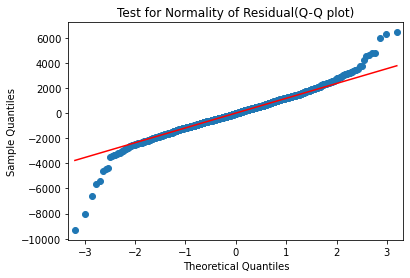

In [33]:
qqplot = sm.qqplot(res,line='q')
plt.title('Test for Normality of Residual(Q-Q plot)')
plt.show()

In [34]:
##outlier detection from above qq plot
list(np.where(model1.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [35]:
list(np.where(model1.resid<-6000))

[array([220, 600, 959], dtype=int64)]

# Residual plot for Homoscedasticity

In [36]:
def get_standardized_values (vals):
    return (vals - vals.mean())/vals.std()

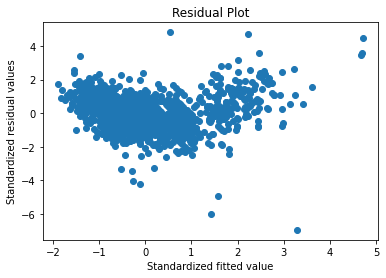

In [37]:
plt.scatter(get_standardized_values(model1.fittedvalues),
           get_standardized_values(model1.resid))
plt.title("Residual Plot")
plt.xlabel('Standardized fitted value')
plt.ylabel('Standardized residual values')
plt.show()

# Residual vs Regressor

eval_env: 1


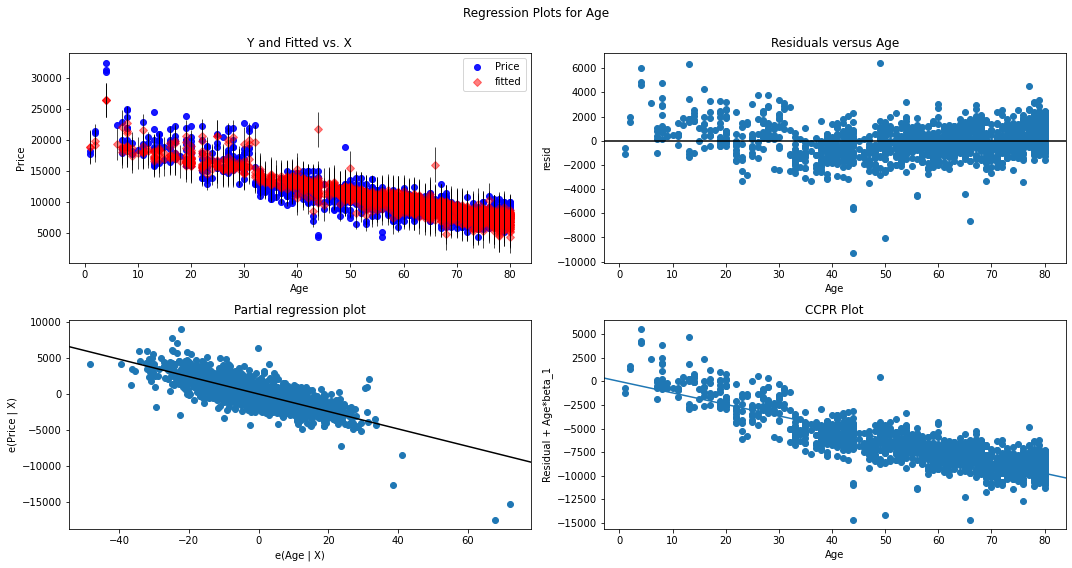

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1,"Age",fig=fig)
plt.show()


eval_env: 1


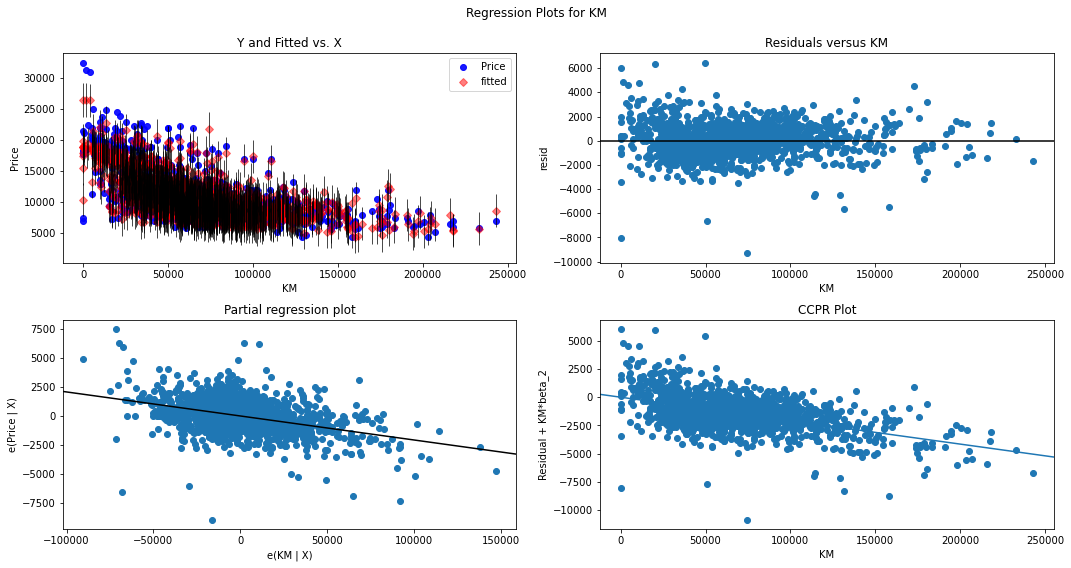

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1,"KM",fig=fig)
plt.show()

eval_env: 1


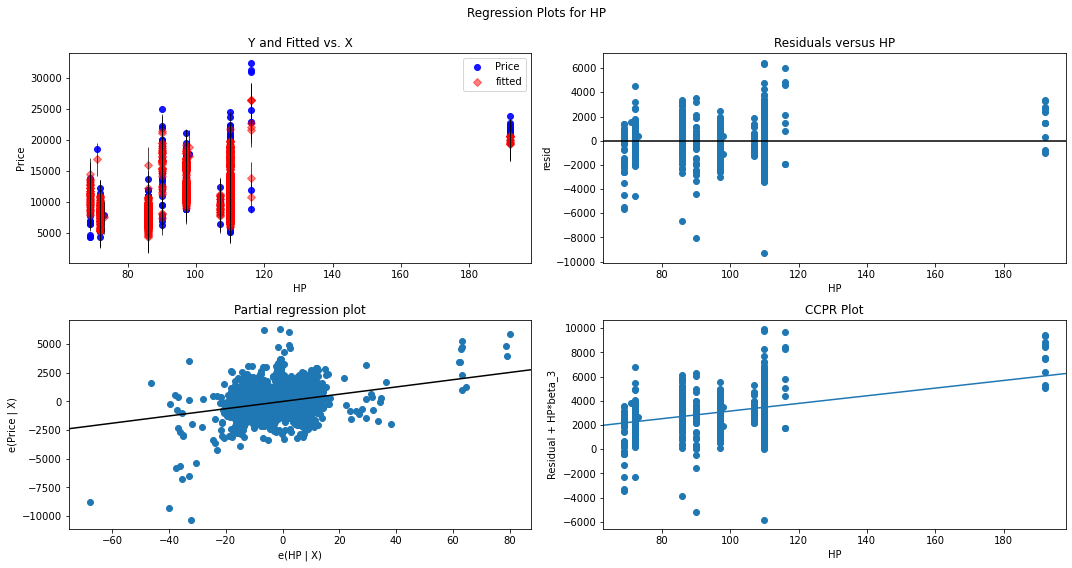

In [40]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"HP",fig=fig)
plt.show()

eval_env: 1


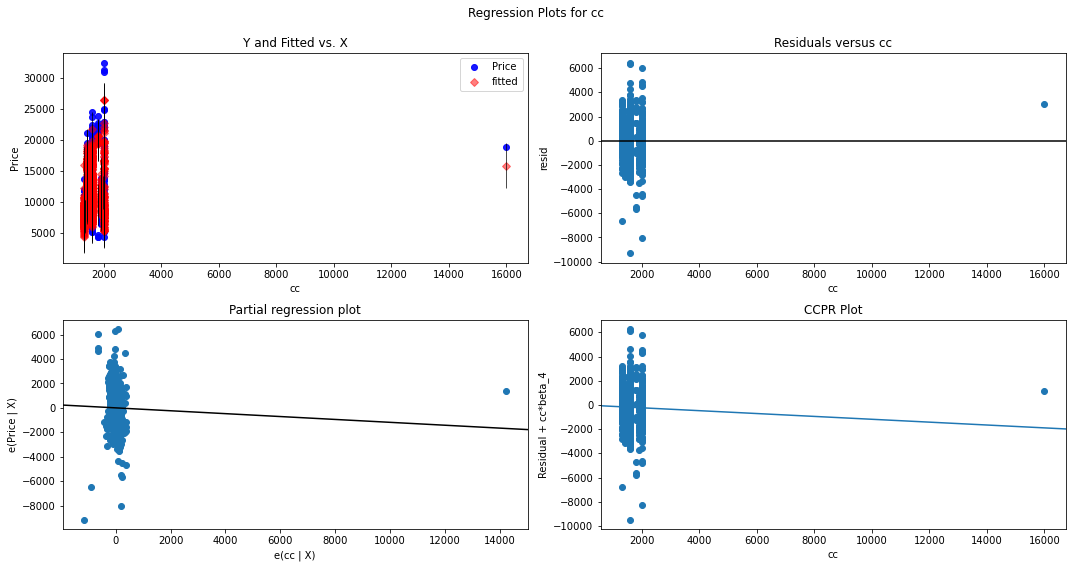

In [41]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"cc",fig=fig)
plt.show()

eval_env: 1


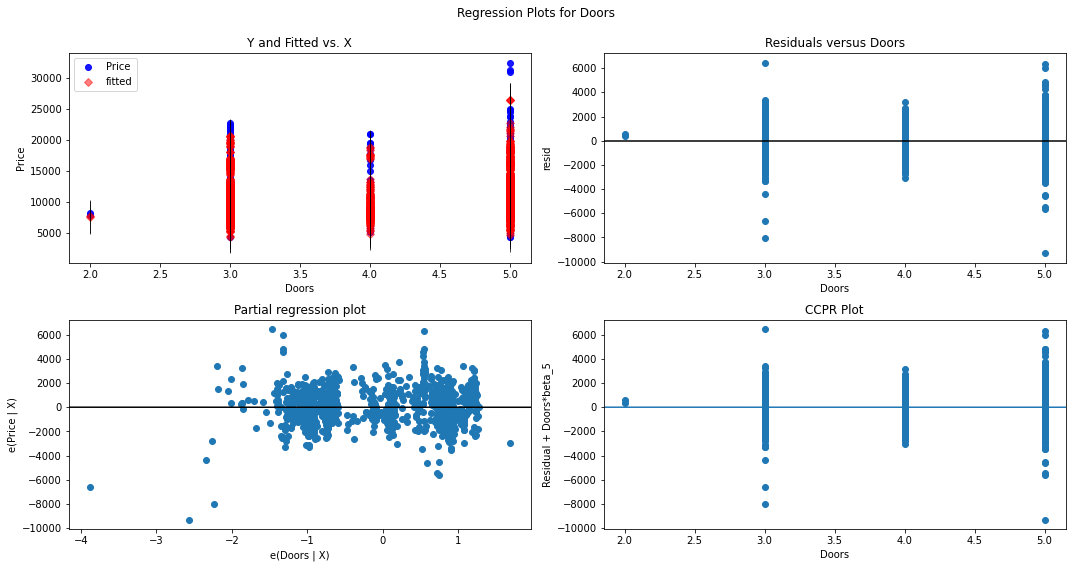

In [42]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"Doors",fig=fig)
plt.show()

eval_env: 1


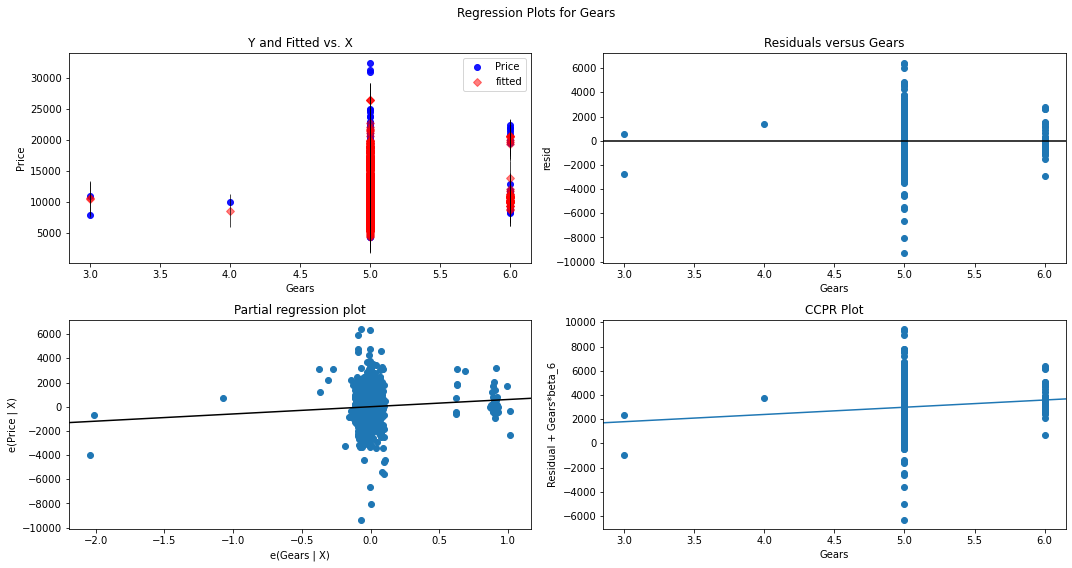

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1,"Gears",fig=fig)
plt.show()

eval_env: 1


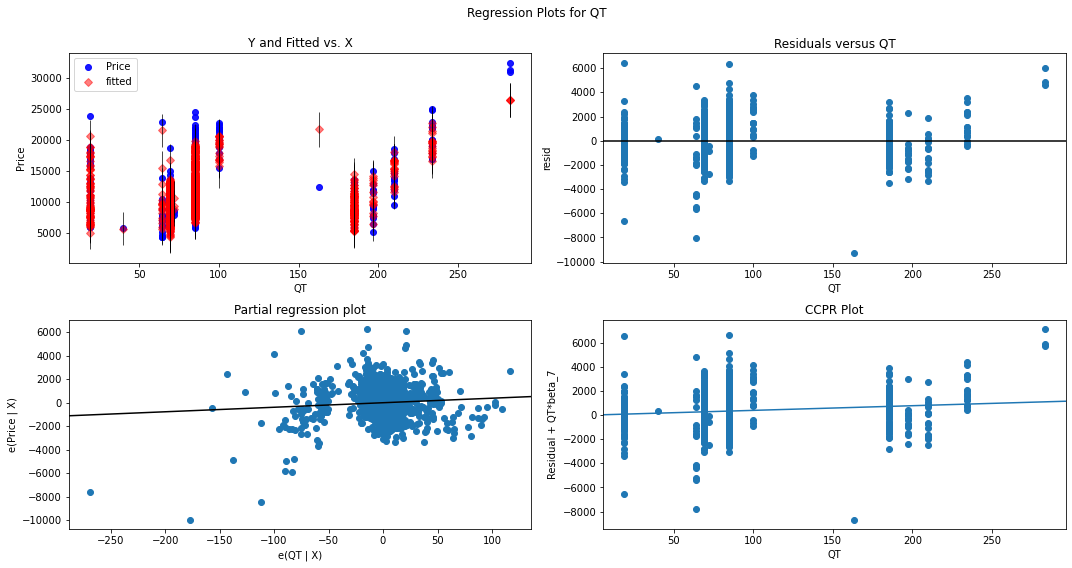

In [44]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"QT",fig=fig)
plt.show()

eval_env: 1


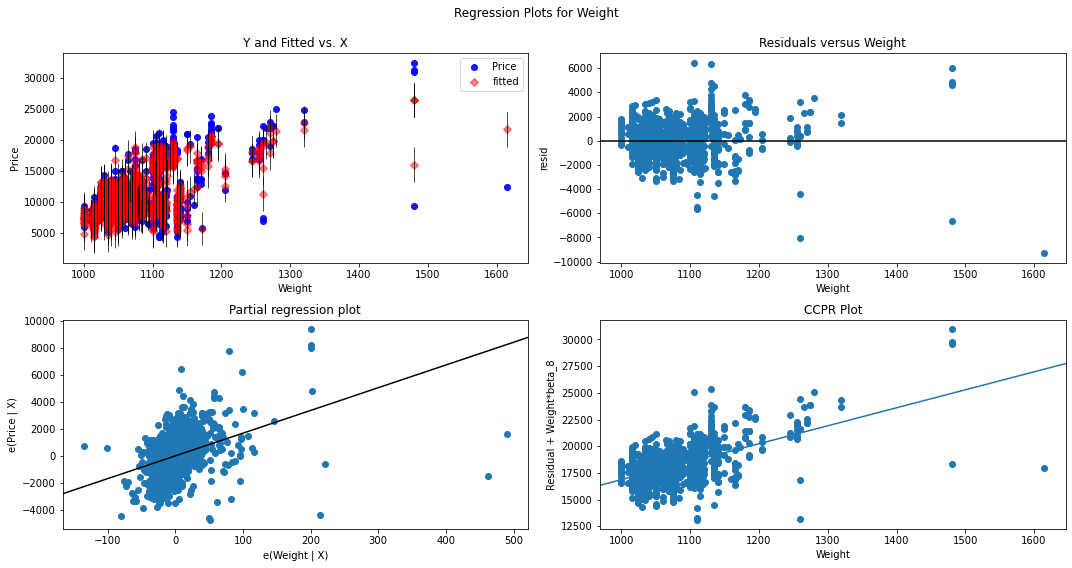

In [45]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"Weight",fig=fig)
plt.show()

# Cook's Distance

In [46]:
model_influence = model1.get_influence()
(c,_) = model_influence.cooks_distance

In [47]:
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

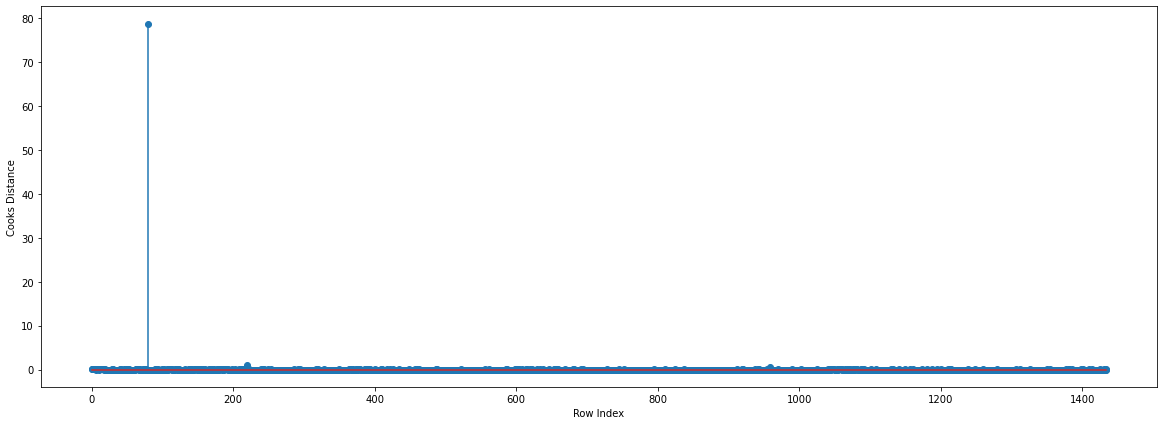

In [48]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data3)),c)
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [49]:
np.argmax(c), np.max(c)

(80, 78.72950582248232)

In [50]:
data3[data3.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the Model

In [51]:
data_new = data3.copy()

In [52]:
data_new

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [53]:
data4 = data_new.drop(data_new.index[[80]],axis=0).reset_index()


In [54]:
data4

,index,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1430,7500,69,20544,86,1300,3,5,69,1025
1430,1431,10845,72,19000,86,1300,3,5,69,1015
1431,1432,8500,71,17016,86,1300,3,5,69,1015
1432,1433,7250,70,16916,86,1300,3,5,69,1015


In [55]:
data5 = data4.drop(['index'],axis=1)

In [56]:
data5

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


# Building Our  Model

In [57]:
final_model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=data5).fit()

In [58]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:09:08   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
Age         -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM            -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP            39.2245      2.912     13.470      0.000      33.512      44.937
cc            -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors        -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears        527.1292    192.832      2.734      0.006     148.864     905.395
QT             8.9414      1.427      6.268      0.000       6.143      11.740
Weight        20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
'''
for doors column probability > 0.05
so again calculate cooks distance
'''

'\nfor doors column probability > 0.05\nso again calculate cooks distance\n'

# Cook's Distance

In [60]:
model_influence = model1.get_influence()
(c,_) = model_influence.cooks_distance

In [61]:
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

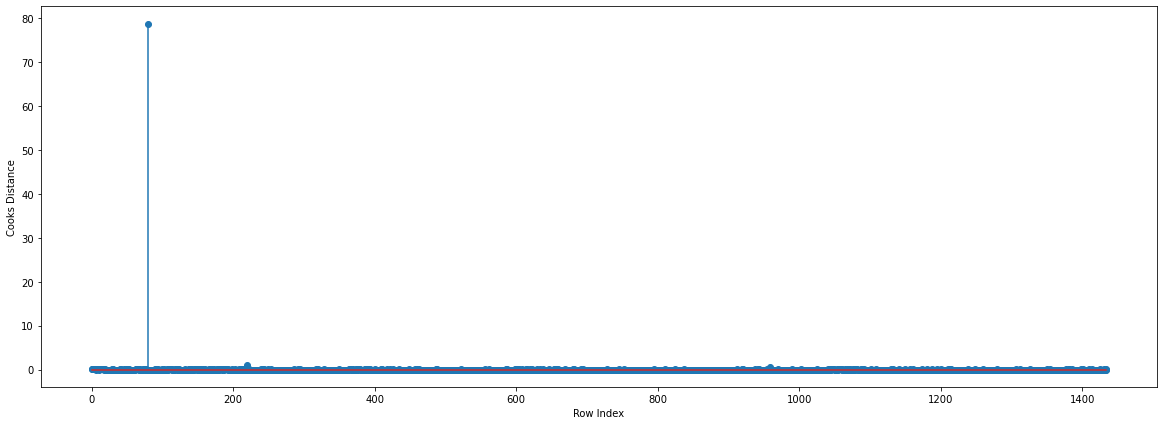

In [62]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data3)),c)
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [63]:
np.argmax(c), np.max(c)

(80, 78.72950582248232)

In [64]:
data5[data5.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
80,17250,29,20000,110,1600,5,5,85,1115


In [65]:
data_new1 = data5.copy()

In [66]:
data6 = data_new1.drop(data_new1.index[[80]],axis=0).reset_index(drop=True)


In [67]:
data6

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [68]:
'''
still rsqured not improved so we have to do same task number of times so use while loop
'''

'\nstill rsqured not improved so we have to do same task number of times so use while loop\n'

# Building our Final Model

In [69]:
while final_model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=data6).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data6=data6.drop(data6.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data6
    else:
        final_model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=data6).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)


Thus model accuracy is improved to 0.8764046306635495
Thus model accuracy is improved to 0.8837942696149219
Thus model accuracy is improved to 0.8880711544745218
Thus model accuracy is improved to 0.8900925958801076
Thus model accuracy is improved to 0.8908253216072245
Thus model accuracy is improved to 0.8920979539178565
Thus model accuracy is improved to 0.8932033556172324
Thus model accuracy is improved to 0.894557849314899
Thus model accuracy is improved to 0.8953671188551238
Thus model accuracy is improved to 0.8928549552865381
Thus model accuracy is improved to 0.8937898677669762
Thus model accuracy is improved to 0.8952502191302207
Thus model accuracy is improved to 0.895859980540278
Thus model accuracy is improved to 0.8966824689242233
Thus model accuracy is improved to 0.896242427553931
Thus model accuracy is improved to 0.8956917521292062
Thus model accuracy is improved to 0.8952104637778968
Thus model accuracy is improved to 0.8947789593011061
Thus model accuracy is improved

In [70]:
(final_model.rsquared,final_model.aic)

(0.9000236719841401, 22093.03379161399)

# Model Prediction

In [71]:
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"cc":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data


,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [72]:
# Manual Prediction of Price
final_model.predict(new_data)


0    14396.51614
dtype: float64

# Predict for new data

In [73]:
pred_y = final_model.predict(data6)

In [74]:
pred_y

0       15352.068599
1       15411.346691
2       15309.446842
3       14746.508384
4       17541.589412
            ...     
1325     7606.269569
1326     9204.226574
1327     8533.761181
1328     8672.548855
1329     8782.325947
Length: 1330, dtype: float64

In [75]:
data["Price_Predictions"]=pred_y
data.head()


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price_Predictions
0,13500,23,46986,90,2000,3,5,210,1165,15352.068599
1,13750,23,72937,90,2000,3,5,210,1165,15411.346691
2,13950,24,41711,90,2000,3,5,210,1165,15309.446842
3,14950,26,48000,90,2000,3,5,210,1165,14746.508384
4,13750,30,38500,90,2000,3,5,210,1170,17541.589412
